### Capstone Project - Text Summarization

#### Data Sources

Data source: Kaggle

Dataset used: https://www.kaggle.com/datasets/pariza/bbc-news-summary

Description: This dataset for extractive text summarization has four hundred and seventeen political news articles of BBC from 2004 to 2005 in the News Articles folder. For each article, summaries are provided. 



#### Methodology

In this notebook, I have generated summaries using both Abstractive and Extractive methods for the tech articles. 
Calculated and compared the Corpus_Bleu scores for each of the summaries with reference to the summaries from Kaggle dataset.
Created wordcloud, word frequencies bar chart visualizations and printed sentence scores for the user requested text input.


#### Techniques:

Used Natural Language Processing (NLP) NLTK took kit  do the extractive summarization and Hugging face transformers for abstractive summarization
Used corpus_bleu scores to measure the quality/match of the summary generated to the summary from the dataset.

Created two User prompt codes 
1. Take number of articles user want to create summary for. Ask for expected summary length as well.
2. Take the text as input from the user and create wordcloud, word frequencies bar chart visualizations and print sentence scores. Generate summary as per user input


### Text Summarization

Read the text from the file and performed below steps to generate summary

**Extractive Text Summarization**

1. Generated word tokens using word_tokenize()function. 
2. Created a word frequencies dictionary for the words frequencies for the words that are not in punctuation or stopwords.
3. Used sent_tokenize function to generat sentence tokens. 
4. Based on word frequency dictionary, parsed and scored the sentences with the words present in them.
5. Took the top 30% or 40% of the sentences based on user request and generated the summary. 

**Abstractive Text Summarization**

1. Installed the transformers to import pipeline
2. Instantiated the Summarization pipeline
3. Provided the text and required summary length as input to the summarizer and generated the summary


**Installed transformers, pytorch and wordcloud modules to create wordcloud images**
 
!pip install wordcloud 

!pip install transformers==4.11.3

!pip3 install torch torchvision torchaudio

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from datasets import load_metric


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neofu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neofu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
from nltk.translate.bleu_score import corpus_bleu
from transformers import pipeline

In [115]:
# Imported the libraries needed for visualization 

import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [145]:
# Using OS module, navigating through the local directories for the News Articles

import os
import pandas as pd
path_, filename_, category_, = [],[],[]
for dirname, _, filenames in os.walk('C:/Users/neofu/Downloads/Jyothi UCB/BBC News Summary/News Articles/sport'):
    for filename in filenames:
        path_.append(os.path.join(dirname, filename))
        filename_.append(filename)
        category_.append(dirname.split("/")[-1])
        

In [146]:
# Created a dataframe out of the local directory and files to read each of them easily

df_articles = pd.DataFrame({"path":path_, "filename":filename_, "category":category_, }, columns=["path", "filename", "category"])
df_articles.head()

,path,filename,category
0,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,001.txt,sport
1,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,002.txt,sport
2,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,003.txt,sport
3,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,004.txt,sport
4,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,005.txt,sport


In [147]:
# Using OS module, navigating through the local directories for the Summaries

path_, filename_, category_, = [],[],[]
for dirname, _, filenames in os.walk('C:/Users/neofu/Downloads/Jyothi UCB/BBC News Summary/Summaries/sport'):
    for filename in filenames:
        path_.append(os.path.join(dirname, filename))
        filename_.append(filename)
        category_.append(dirname.split("/")[-1])

In [148]:
df_summaries = pd.DataFrame({"path":path_, "filename":filename_, "category":category_, }, columns=["path", "filename", "category"])
df_summaries.head()

,path,filename,category
0,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,001.txt,sport
1,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,002.txt,sport
2,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,003.txt,sport
3,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,004.txt,sport
4,C:/Users/neofu/Downloads/Jyothi UCB/BBC News S...,005.txt,sport


#### Extractive Summarization Function Code



In [149]:

# Created a function to generate summary by extracting the highest scored sentences based on the word frequencies 
# for the words in each of them
# Tokenized the received text into words and created a word_frequency dictionary for the words that are not stopwords or punctuation marks
# Tokenized the received text into sentences and generated sentence scores based upon the data from word frequencies
# Extracted the highest scored sentences in the order of the index so that flow of text is preserved and joined them as a summary


def extractive_summarization(text, summary_length):
    words = word_tokenize(text)
    word_frequencies = {}
    for word in words:
        if word.lower() not in stopwords.words('english'):
            if word.lower() not in punctuation:
                if word not in word_frequencies.keys():
                    word_frequencies[word.lower()] = 1
                else:
                    word_frequencies[word.lower()]+=1
    max_frequency = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word]/max_frequency
    sent_tokens = sent_tokenize(text)
    sent_scores = {}
    for sent in sent_tokens:
        for word in word_tokenize(sent):
            if word.lower() in word_frequencies.keys():
                if sent not in sent_scores.keys():
                    sent_scores[sent] = word_frequencies[word.lower()]
                else:
                    sent_scores[sent]+=word_frequencies[word.lower()]
        dict_Sent = {'Sentence': sent_scores.keys(),
            'Score': sent_scores.values()}
    df_sent_scores = pd.DataFrame.from_dict(dict_Sent)
    summary = df_sent_scores.nlargest(int(float(summary_length)*len(sent_tokens)), 'Score', keep='all').sort_index()
    final_summary = (' '.join(summary['Sentence']))
    return(final_summary)

#### Abstractive Summarization Function Code

In [150]:
# Imported the pipeline from the huggingface transformers and instantiated the Summarization pipeline 

summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [151]:
# Passed received text as input and generated abstract summary using the summarization pipeline instance

def abstractive_summarization(text,summary_length):
    words = word_tokenize(text)
    abstract_summary = summarizer(text, max_length= int(float(summary_length)*len(words)), min_length = 30, do_sample = False)
    return(abstract_summary[0]['summary_text'])

#### Receive user input, call the defined abstract and extractive summarization functions, and generate summary and bleu scores

In [152]:

num_articles = input("Provide Number of Articles you want to generate summaries for(mention a number between 1 and 5): ")
summary_len = input("Provide summary size in % of original text. For ex: 0.3 or 0.4 etc.")
articles = random.sample(range(1, df_articles.shape[0]), int(num_articles))
extract_scores = []
abstract_scores = []
for article in articles:
    file = open(df_articles['path'][article], 'r')
    text = file.read()
    extract_summary = extractive_summarization(text, summary_len)
    print("FOR ARTICLE #", article)
    print("\n\nSummary from Extractive Summarization: \n")
    print(extract_summary)
    abstract_summary = abstractive_summarization(text, summary_len)
    print("\n\nSummary from Abstractive Summarization: \n")
    print(abstract_summary)

    # Scoring the summarized text against the summary from Kaggle dataset
    summary = open(df_summaries['path'][article], 'r').read()
    references = [[summary]]
    print("\n\nSummary from Kaggle Dataset: \n")
    print(summary)
    
    candidates = [extract_summary]
    extract_scores.append(round(corpus_bleu(references, candidates),4))
    
    candidates = [abstract_summary]
    abstract_scores.append(round(corpus_bleu(references, candidates),4))
    
df_scores = {'Article #': articles,
            'Abstract_scores': abstract_scores,
            'Extract_scores': extract_scores}
df_scores = pd.DataFrame(df_scores)
df_scores
    

Provide Number of Articles you want to generate summaries for(mention a number between 1 and 5): 2
Provide summary size in % of original text. For ex: 0.3 or 0.4 etc.0.3
FOR ARTICLE # 278


Summary from Extractive Summarization: 

Newcastle line up Babayaro

Newcastle manager Graeme Souness is closing in on signing Chelsea defender Celestine Babayaro when the transfer window reopens. But he said: "All I can tell you is that the chairman has worked really hard in the last couple of months to try to do deals.


Summary from Abstractive Summarization: 

 Newcastle manager Graeme Souness is closing in on signing Chelsea defender Celestine Babayaro . The 26-year-old has been surplus to requirements this season . Babayar has been in


Summary from Kaggle Dataset: 

Babayaro has been in the Premiership since 1997 when he moved to Chelsea for Â£2.25m from Anderlecht.Newcastle manager Graeme Souness is closing in on signing Chelsea defender Celestine Babayaro when the transfer window reopens.Bu

,Article #,Abstract_scores,Extract_scores
0,278,0.2879,0.7229
1,285,0.1166,0.3182


#### Observation

From the above bleu scores it shows for aritle 278 from Sports, the abstract summary generated is only a 28% match with the summary from the dataset. While the Extractive summary generated matches 72% with the summary from the dataset.
It's as expected since the description of the dataset mentioned the summaries provided are extractive summaries. And Bleu scores are based on n-gram matches. So, it's obvious that extractive summary bleu score will be greater than abstract summary score**

In [153]:
def visualize(text):
    word_cloud = WordCloud(stopwords =stopwords.words('english'),max_font_size=100,background_color="white").generate(text)
    plt.figure(figsize = (8,10))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    #punctuation = punctuation+ "\n"
    
    #Calculating Word Frequencies
    
    words = word_tokenize(text)
    word_frequencies = {}
    for word in words:
        if word.lower() not in stopwords.words('english'):
            if word.lower() not in punctuation:
                if word not in word_frequencies.keys():
                    word_frequencies[word.lower()] = 1
                else:
                    word_frequencies[word.lower()]+=1
    word_freq_dict = {'Word': word_frequencies.keys(),
                     'Frequency': word_frequencies.values()}
    word_freq = pd.DataFrame.from_dict(word_freq_dict).sort_values(by='Frequency', ascending = False) 
   
    
    #Calculating Sentence Scores based on word frequencies
    
    sent_tokens = sent_tokenize(text)
    sent_scores = {}
    for sent in sent_tokens:
        for word in word_tokenize(sent):
            if word.lower() in word_frequencies.keys():
                if sent not in sent_scores.keys():
                    sent_scores[sent] = word_frequencies[word.lower()]
                else:
                    sent_scores[sent]+=word_frequencies[word.lower()]
    dict_Sent = {'Sentence': sent_scores.keys(),
            'Score': sent_scores.values()}
    df_sent_scores = pd.DataFrame.from_dict(dict_Sent)
    return(word_freq, df_sent_scores)

Do you want to visualize the wordcloud, word frequencies, sentence scores for your own text? Type Yes/No : Yes
Provide your own text: Robben and Cole earn Chelsea win  Cheslea salvaged a win against a battling Portsmouth side just as it looked like the Premiership leaders would have to settle for a point.  Arjen Robben curled in a late deflected left-footed shot from the right side of Pompey's box to break the home side's brave resistance. Chelsea had been continually frustrated but Joe Cole added a second with a 20-yard shot in injury-time. Nigel Quashie had Pompey's best chance when his effort was tipped over. The Fratton Park crowd were in good voice as usual and, even though Portsmouth more than held their own, Chelsea still managed to carve out two early chances. Striker Didier Drogba snapped in an angled shot to force home keeper Shaka Hislop into a smart save while an unmarked Frank Lampard had a strike blocked by Arjan De Zeeuw. But Pompey chased, harried and unsettled a Chelse

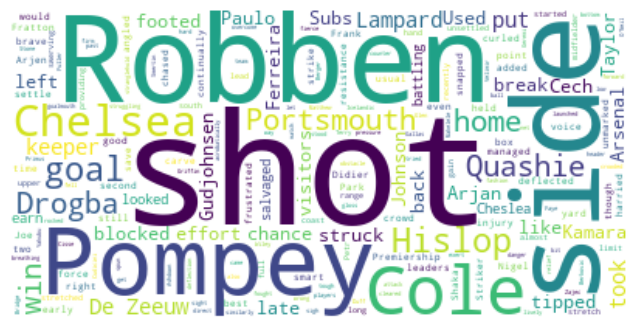



Summary from Extractive Summarization: 

Arjen Robben curled in a late deflected left-footed shot from the right side of Pompey's box to break the home side's brave resistance. Striker Didier Drogba snapped in an angled shot to force home keeper Shaka Hislop into a smart save while an unmarked Frank Lampard had a strike blocked by Arjan De Zeeuw. Drogba spun to get a sight of goal and struck a fierce shot which rocked keeper Hislop back as he blocked before Arjan de Zeeuw cleared the danger. But, just like against Arsenal, Portsmouth let in a late goal when Robben's shot took a deflection off Matthew Taylor on its way past a wrong-footed Hislop.


Summary from Abstractive Summarization: 

 Arjen Robben curled in a late deflected shot from the right side of Pompey's box to break the home side's brave resistance . Joe Cole added a second with a 20-yard shot in injury-time to seal a 2-1 win .


In [154]:
user_input = input("Do you want to visualize the wordcloud, word frequencies, sentence scores for your own text? Type Yes/No : ")
if user_input == 'Yes':
    user_text = input("Provide your own text: ")
    user_summ  =input("Do you want to Summarize? Type Yes/No: ")
    word_freq, df_sent_scores = visualize(user_text)
    if user_summ == 'Yes':
        extract_summary = extractive_summarization(user_text, 0.2)
        print("\n\nSummary from Extractive Summarization: \n")
        print(extract_summary)
        abstract_summary = abstractive_summarization(user_text, 0.2)
        print("\n\nSummary from Abstractive Summarization: \n")
        print(abstract_summary)
    else:
        print("Hope you liked the visualizations")
else:
    print("See you next time")

#### Generating Word Cloud

<Axes: xlabel='Frequency', ylabel='Word'>

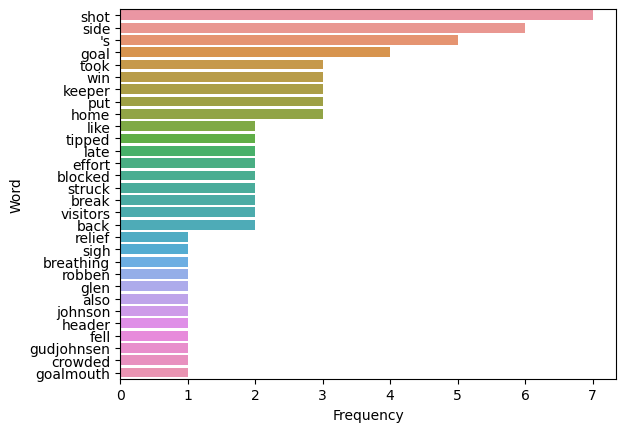

In [155]:
sns.barplot(word_freq.head(30), x='Frequency',y='Word', ) 

In [156]:
df_sent_scores 

,Sentence,Score
0,Robben and Cole earn Chelsea win Cheslea salv...,28
1,Arjen Robben curled in a late deflected left-f...,46
2,Chelsea had been continually frustrated but Jo...,16
3,Nigel Quashie had Pompey's best chance when hi...,14
4,The Fratton Park crowd were in good voice as u...,17
5,Striker Didier Drogba snapped in an angled sho...,32
6,"But Pompey chased, harried and unsettled a Che...",28
7,The midfielder struck a swerving long range sh...,22
8,Pompey stretched Arsenal to the limit recently...,15
9,Velimir Zajec's players stood firm as the visi...,26
